In [91]:
from qutip import *
import scipy.linalg as la
from scipy import *
import numpy as np
import matplotlib.pyplot as plt


In [92]:
wBlist=np.linspace(0,10,20);    

wv=1; T=2*np.pi/wv;

Nenergie1=np.zeros(len(wBlist))
eargslist=np.zeros(len(wBlist))
e_quasilist=np.zeros(len(wBlist))
evalslist=np.zeros(len(wBlist))


e=0.5

for n, wB in enumerate(wBlist):
    
    Hx =  1/2*wB*sigmax()
    Hy = 1/2*wB*sigmay()
    args = {'wv': wv}
    H = [ [Hx, 'cos(wv*t)'], [Hy, 'sin(wv*t)']]
    
    U = propagator(H, T,[], args,unitary_mode='single')
    evals, evecs = la.eig(U.full())
    eargs = angle(evals)
    e_quasi = -eargs / T
    
    evalslist[n]=evals[0]
    eargslist[n]=eargs[0]
    e_quasilist[n]=e_quasi[0]
    Nenergie1[n]=e_quasi[0]
    
SAenergie1=1/2*(1-np.sqrt((wBlist/omegav)**2+1))

/Users/amc/anaconda3/envs/qutip4-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


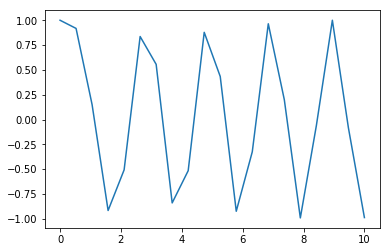

In [93]:
plt.plot(wBlist,evalslist)

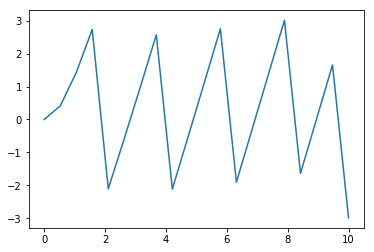

In [94]:
plt.plot(wBlist,eargslist)

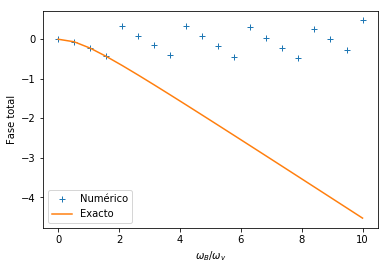

In [95]:

plt.plot(wBlist,Nenergie1,'+',label='Numérico')
plt.plot(wBlist,SAenergie1,label='Exacto')
plt.legend()
plt.xlabel('$\omega_{B}/\omega_{v}$')
plt.ylabel('Fase total')
plt.savefig('FaseTotalparaDistintosQe0.5.png' ,dpi=600,bbox_inches='tight')


In [21]:
wBlist=np.linspace(0,2,20);    

omegav=1; T=2*np.pi/omegav;

Nenergie1=np.zeros(len(wBlist))



for n, wB in enumerate(wBlist):
    Hx =  1/2*wB*sigmax()
    Hy = 1/2*wB*sigmay()
    args = {'wv': omegav}
    H = [ [Hx, 'cos(wv*t)'], [Hy, 'sin(wv*t)']]
    
    f_modes_0, f_energies = floquet_modes(H, T, args)
    Nenergie1[n]=f_energies[0]
    
SAenergie1=1/2*(1-np.sqrt((wBlist/omegav)**2+1))

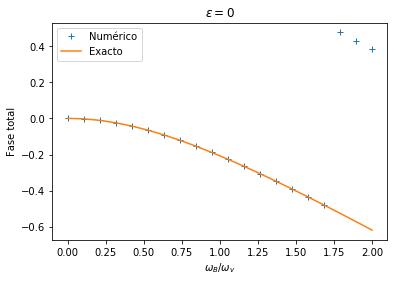

In [22]:

plt.plot(wBlist,Nenergie1,'+',label='Numérico')
plt.plot(wBlist,SAenergie1,label='Exacto')
plt.legend()
plt.xlabel('$\omega_{B}/\omega_{v}$')
plt.ylabel('Fase total')
plt.title('$\epsilon=0$')
plt.savefig('FaseTotalparaDistintosQe0.png' ,dpi=600,bbox_inches='tight')

In [24]:
wB=1
omegav=1; T=2*np.pi;
Hx =  1/2*wB*np.sqrt(1-e**2)*sigmax()
Hy = 1/2*wB*sigmay()
args = {'wv': omegav}
H = [ [Hx, 'cos(wv*t)'], [Hy, 'sin(wv*t)']]

        
U = propagator(H, T, [], args)
evals, evecs = la.eig(U.full())
qe1=complex(np.log(evals[0])/T)
print(qe1)

(5.0800526162264503e-17+0.1825135504784918j)
